# A Look at How Alveston C of E Primary School is Doing

I decided to work on this project because not so long ago I heard it said that our school is not performing as well as it should be when compared to other schools with similar socio-economic backgrounds.

I thought it would be interesting to see to what extent this proposition is true or false.

## The Data

In order to make this as accurate as possible, I sourced the most recent and thorough data that I could find. I downloaded the data from the UK government's website for all the schools in the UK.

The data can be found <a href="https://www.compare-school-performance.service.gov.uk/download-data" target="_blank">here</a>

In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import sys

# load the data
ds = pd.read_csv('/home/bodhi/Python/Python_3/Projects/ML/Schools/school_data.csv',
                low_memory=False)

## Extracting the Most Relevant Data

I created a pandas DataFrame to hold the most relevant data for the schools which are the most similar in terms of demographics to Alveston School.

After looking at the columns in the data, I decided that the best indicators of a school's socio-economic context could be found in the following information:

* The percentage of children who are considered disadvantaged because they have received free school meals in the past six years (pupil premium)
* The percentage of children who speak English as a foreign language (included to account for a cultural context)
* The percentage of children who have special educational needs (sen)

To limit the number of schools, and to ensure they are the closest in the country to Alveston School, I filtered the data to include schools within +-1% of Alveston's percentages for the above mentioned categories of pupil.

I used a three-year average score for reading and maths, becuase if 2019 had been an unusually weak or strong cohort for any of the schools, the comparison would not have been accurate.

My code is below:

In [8]:
# create a dataframe of schools similiar to Alveston using three indicators:
# pupil premium % of children enrolled at the school
# eal % of children enrolled at the school
# send % of children enrolled at the school
df = ds[(ds['pp'] < 0.09) & (ds['eal'] < 0.02) & (ds['sen'] < 0.16)]
df = df[(df['pp'] > 0.05) & (df['sen'] > 0.12)]
df = pd.DataFrame(df, columns=['SCHNAME', 'pp', 'eal', 'sen', 'reading', 'maths']).copy()

## Visualising the Data

Next, I converted the data into percentages to make it easier to read on the scatter-graph. I also worked out the median scores for reading and writing found across the collection of schools which have the most similar socio-economic contexts to Alveston School.

I chose the median scores over the mean as there are some extremes in performance and therefore the median is a better representation of the average scores.

In [9]:
# make the data read as percentages and work out the median values
df['pp'] = round(df['pp'] * 100)
df['eal'] = round(df['eal'] * 100)
df['sen'] = round(df['sen'] * 100)

r_median = df['reading'].median()
m_median = df['maths'].median()

I then created a scatter-graph to better see how Alveston C of E Primary School is performing when compared to the schools which are most similar to it in terms of their socio-economic context.

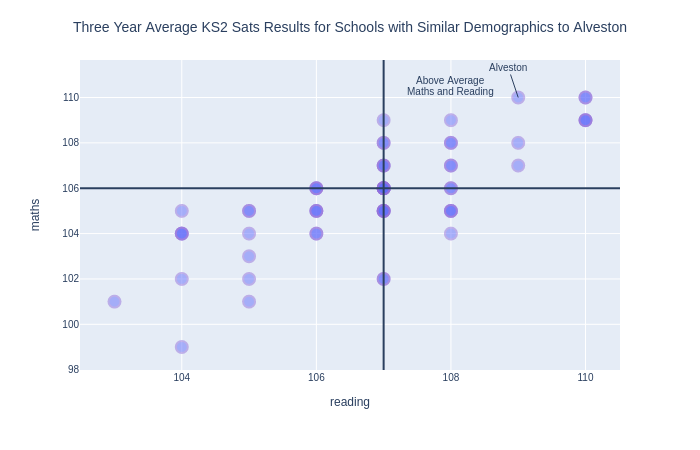

In [10]:
# visualise the data
pio.renderers.default='png'

fig = px.scatter(df, x='reading', y='maths',
                 hover_data=['pp', 'eal', 'sen'],
                 opacity=0.5,
                 hover_name='SCHNAME')
fig.add_annotation(x=109,
                  y=110,
                  text='Alveston')
fig.add_annotation(x=108,
                  y=110.75,
                  text='Above Average',
                  showarrow=False)
fig.add_annotation(x=108,
                  y=110.25,
                  text='Maths and Reading',
                  showarrow=False)
fig.update_traces(marker=dict(
                              size=12,                              
                             line=dict(width=2,
                                      color='MediumPurple')),
                 selector=dict(mode='markers'))
fig.update_layout(shapes=[dict(type='line',
                              yref='paper', y0=0, y1=1,
                              xref='x', x0=r_median, x1=r_median),
                          dict(type='line',
                              yref='y', y0=m_median, y1=m_median,
                              xref='paper', x0=0, x1=1)
                         ],
                  font=dict(size=10),
                  title={'text':'Three Year Average KS2 Sats Results for Schools with Similar Demographics to Alveston',
                        'x':0.5,
                        'y':0.95}
                 )

## What's the Story?

As can be seen from the scatter-graph, Alveston C of E Primary School is above average in terms of reading results and well-above average in terms of maths results when compared to the schools which are most like it in the UK.

## Problems With the Original Proposition

Clearly, the original proposition that Alveston School is not performing very well when compared to similiar schools is wrong from the point of view of my findings.

Alveston School is outperforming most of the schools which have a similar context.

The question has to be raised - on what data was the original proposition made?

The original proposition was based on studies into the number of words children from different socio-economic groups know by certain ages. These studies can be found <a href="https://www.aft.org/sites/default/files/periodicals/TheEarlyCatastrophe.pdf" target="_blank">here</a> and <a href="https://pubmed.ncbi.nlm.nih.gov/23432833/" target="_blank">here</a>

The first problem I see with using findings from these studies is that they were conducted in a very different cultural context to ours; they were carried out in the USA. The second problem I see is that of time - the original study was carried out in 1995, and the most recent in 2013.

I beleive the above points (the unique cultural and chronoligical contexts of the studies the original proposition was based on) explain why the original proposition was flawed.

To further illustrate the main problem of using socio-economic studies undertaken in the USA to try to understand the UK, I created a new scatter-graph which shows GDP per capita plotted against <a href="https://en.wikipedia.org/wiki/Gini_coefficient" target="_blank">GINI</a> coefficient numbers. I think it is clear that the USA is an unusually unequal society in terms of wealth distribution (it is found high above the ordinary least squares line of fit) and will therefore have problems which are unique to its own socio-economic context and which do not transfer to the socio-economic context we find in the UK.

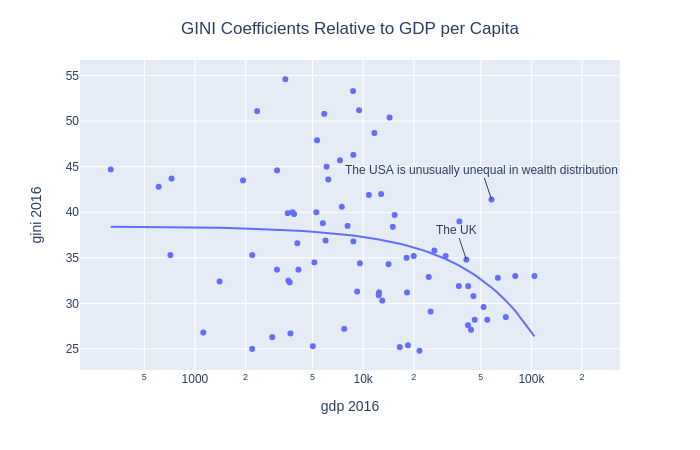

In [13]:
import pandas
import plotly.express as px
import plotly.io as pio

# import the data
df_one = pandas.read_excel('/home/bodhi/Python/Python_3/Projects/New/Data Sets/gdp/gdp.xls')
df_two = pandas.read_excel('/home/bodhi/Python/Python_3/Projects/New/Data Sets/gdp/gini.xls')

# create a dataframe to hold the gdp values for the most recent year
gdp_df = df_one[['Country Name', 'IncomeGroup', 'Region', '2016']].copy()
gdp_df = gdp_df.dropna()
gdp_df['2016'] = round(gdp_df['2016'])
gdp_df = gdp_df.rename(columns={'2016':'gdp 2016'})

# create a dataframe to hold the gini values for the same year
g_df = df_two[['Country Name', '2016']].copy()
g_df = g_df.dropna()
g_df = g_df.rename(columns={'2016':'gini 2016'})

# merge the gdp and gini dataframes
df = pandas.merge(gdp_df, g_df, on='Country Name', how='inner')

x = df['gdp 2016']
y = df['gini 2016']

# plot a scatter graph to see the data (uses a logarhithmic scale as there is a wide
# range for gdp)
pio.renderers.default='png'
fig = px.scatter(df, x, y, log_x=True,
                 trendline='ols',
                 hover_name='Country Name')
fig.add_annotation(x=4.7628885,
                  y=41.4,
                  xref='x',
                  yref='y',
                  text='The USA is unusually unequal in wealth distribution')
fig.add_annotation(x=4.6134613,
                  y=34.8,
                  xref='x',
                  yref='y',
                  text='The UK')
fig.update_layout(font=dict(size=12),
                  title={'text':'GINI Coefficients Relative to GDP per Capita',
                        'x':0.5,
                        'y':0.95})

fig.show()

Even if we take the position that the results from studies undertaken in different cultural and chronoligical contexts can be applied elsewhere, my findings still refute the original proposition. One of the key indicators I chose to use in my project was the percentage of children at each school who are or who have been in the past six years eligible for free school meals. This indicator ensured that the economic context of the families of the children at the selected schools was as similar to the economic context of the families of the children at Alveston C of E Primary School as possible.

## Conclusions

In conclusion, my project shows that Alveston C of E Primary School is doing very well when compared to the British schools in 2020 which are the most similar to it from a socio-economic point of view.

Furthermore, I believe I have sufficiently explained why the original proposition was flawed and therefore erroneous.